In [6]:
import numpy as np
import pandas as pd

In [7]:
matches = pd.read_csv("laliga_matches.csv", index_col=0)


In [8]:
matches

,date,time,comp,round,day,venue,result,gf,ga_x,opponent,...,lost,blocks_y,sh,pass,int,tkl+int,clr,err,season,team
0,17-08-2018,22:15,La Liga,Matchweek 1,Fri,Home,L,0,3,Levante,...,13,7,0,7,9,34,16,0,2020,Real Betis
0,17-08-2018,22:15,La Liga,Matchweek 1,Fri,Away,W,3,0,Betis,...,17,7,4,3,10,24,35,0,2020,Levante
0,17-08-2018,20:15,La Liga,Matchweek 1,Fri,Away,D,0,0,Girona,...,16,8,2,6,10,37,33,0,2020,Valladolid
0,17-08-2018,20:15,La Liga,Matchweek 1,Fri,Home,D,0,0,Valladolid,...,9,4,0,4,13,25,14,0,2020,Girona
1,18-08-2018,22:15,La Liga,Matchweek 1,Sat,Home,W,3,0,Alavés,...,4,2,1,1,6,13,3,1,2020,Barcelona
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,28-05-2023,19:00,La Liga,Matchweek 37,Sun,Home,D,0,0,Valladolid,...,8,18,4,14,7,28,24,0,2019,Almeria
39,28-05-2023,19:00,La Liga,Matchweek 37,Sun,Away,L,0,1,Cádiz,...,10,13,4,9,7,26,25,0,2019,Celta Vigo
39,28-05-2023,19:00,La Liga,Matchweek 37,Sun,Away,D,0,0,Almería,...,13,13,6,7,1,17,18,0,2019,Valladolid
40,28-05-2023,19:00,La Liga,Matchweek 37,Sun,Away,D,2,2,Valencia,...,20,14,6,8,8,25,29,0,2019,Espanyol


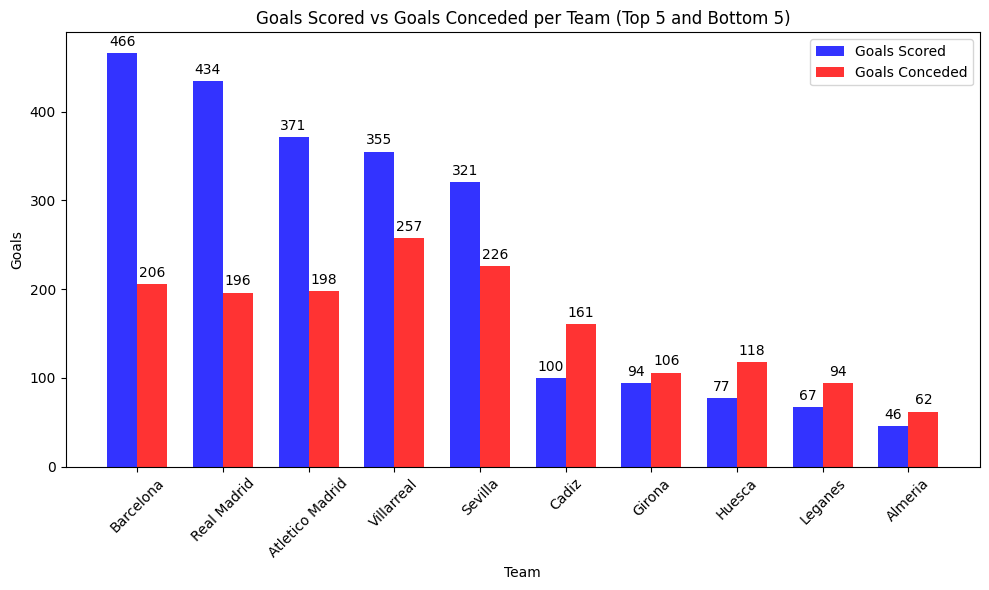

In [9]:
import matplotlib.pyplot as plt

# Grouping the data by team and calculating total goals scored and conceded
team_goals = matches.groupby('team')[['gf', 'ga_x']].sum().reset_index()

# Sorting the data by goals scored
team_goals = team_goals.sort_values('gf', ascending=False)

# Selecting the top 5 and bottom 5 teams
top_teams = team_goals.head(5)
bottom_teams = team_goals.tail(5)

# Combining the top and bottom teams
selected_teams = pd.concat([top_teams, bottom_teams])

# Setting the figure size and creating subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Creating the bar chart
bar_width = 0.35
opacity = 0.8
index = range(len(selected_teams))

rects1 = ax.bar(index, selected_teams['gf'], bar_width, alpha=opacity, color='b', label='Goals Scored')
rects2 = ax.bar([i + bar_width for i in index], selected_teams['ga_x'], bar_width, alpha=opacity, color='r', label='Goals Conceded')

# Setting the labels, title, and legend
ax.set_xlabel('Team')
ax.set_ylabel('Goals')
ax.set_title('Goals Scored vs Goals Conceded per Team (Top 5 and Bottom 5)')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(selected_teams['team'], rotation=45)
ax.legend()

# Adding value labels to the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()

plt.show()


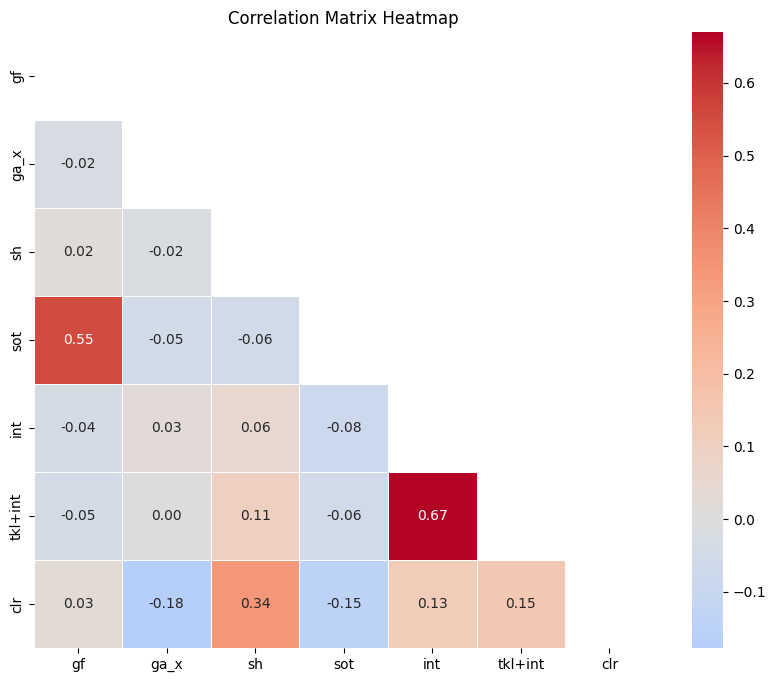

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting the numerical columns for analysis
numeric_columns = ['gf', 'ga_x', 'sh', 'sot', 'int', 'tkl+int', 'clr']

# Creating a correlation matrix
correlation_matrix = matches[numeric_columns].corr()

# Creating a mask to display the upper triangle only
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


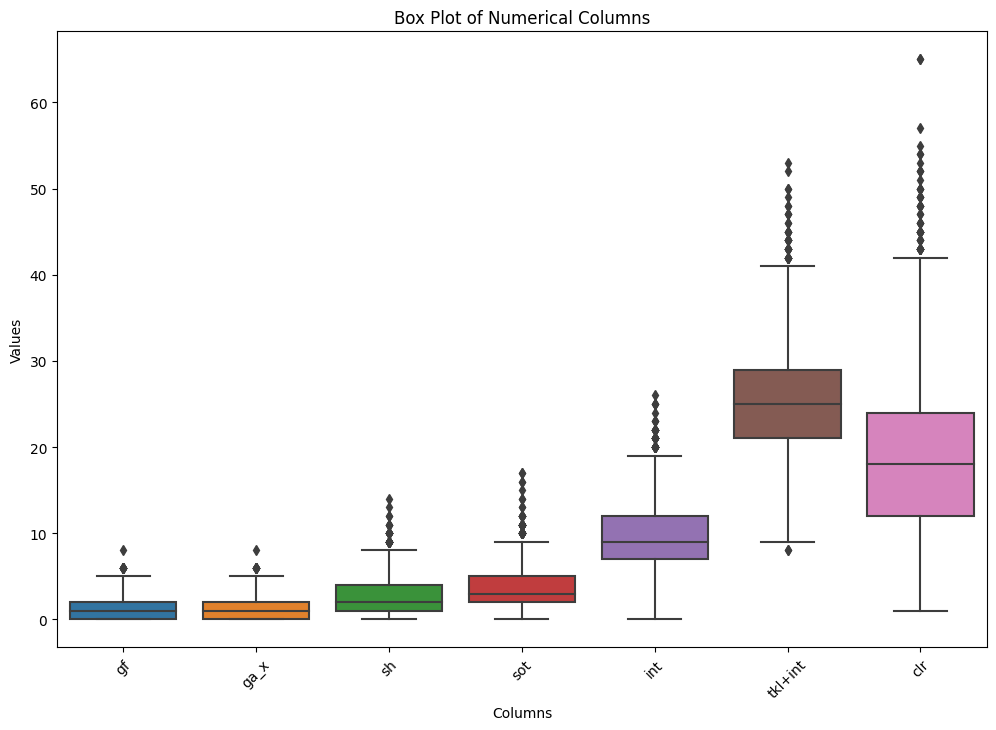

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting the numerical columns for analysis
numeric_columns = ['gf', 'ga_x', 'sh', 'sot', 'int', 'tkl+int', 'clr']

# Creating a box plot for each numerical column
plt.figure(figsize=(12, 8))
sns.boxplot(data=matches[numeric_columns])
plt.title('Box Plot of Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()


Column attendance has 974 null value(s)
Column notes has 4160 null value(s)
Column sot% has 3 null value(s)
Column g/sh has 3 null value(s)
Column g/sot has 140 null value(s)
Column dist has 3 null value(s)
Column npxg/sh has 4 null value(s)
Column ga_y.1 has 1 null value(s)
Column save% has 125 null value(s)
Column cs has 1 null value(s)
Column psxg+/- has 1 null value(s)
Column pkatt_y has 1 null value(s)
Column pka has 1 null value(s)
Column pksv has 1 null value(s)
Column pkm has 1 null value(s)
Column cmp%_y has 11 null value(s)


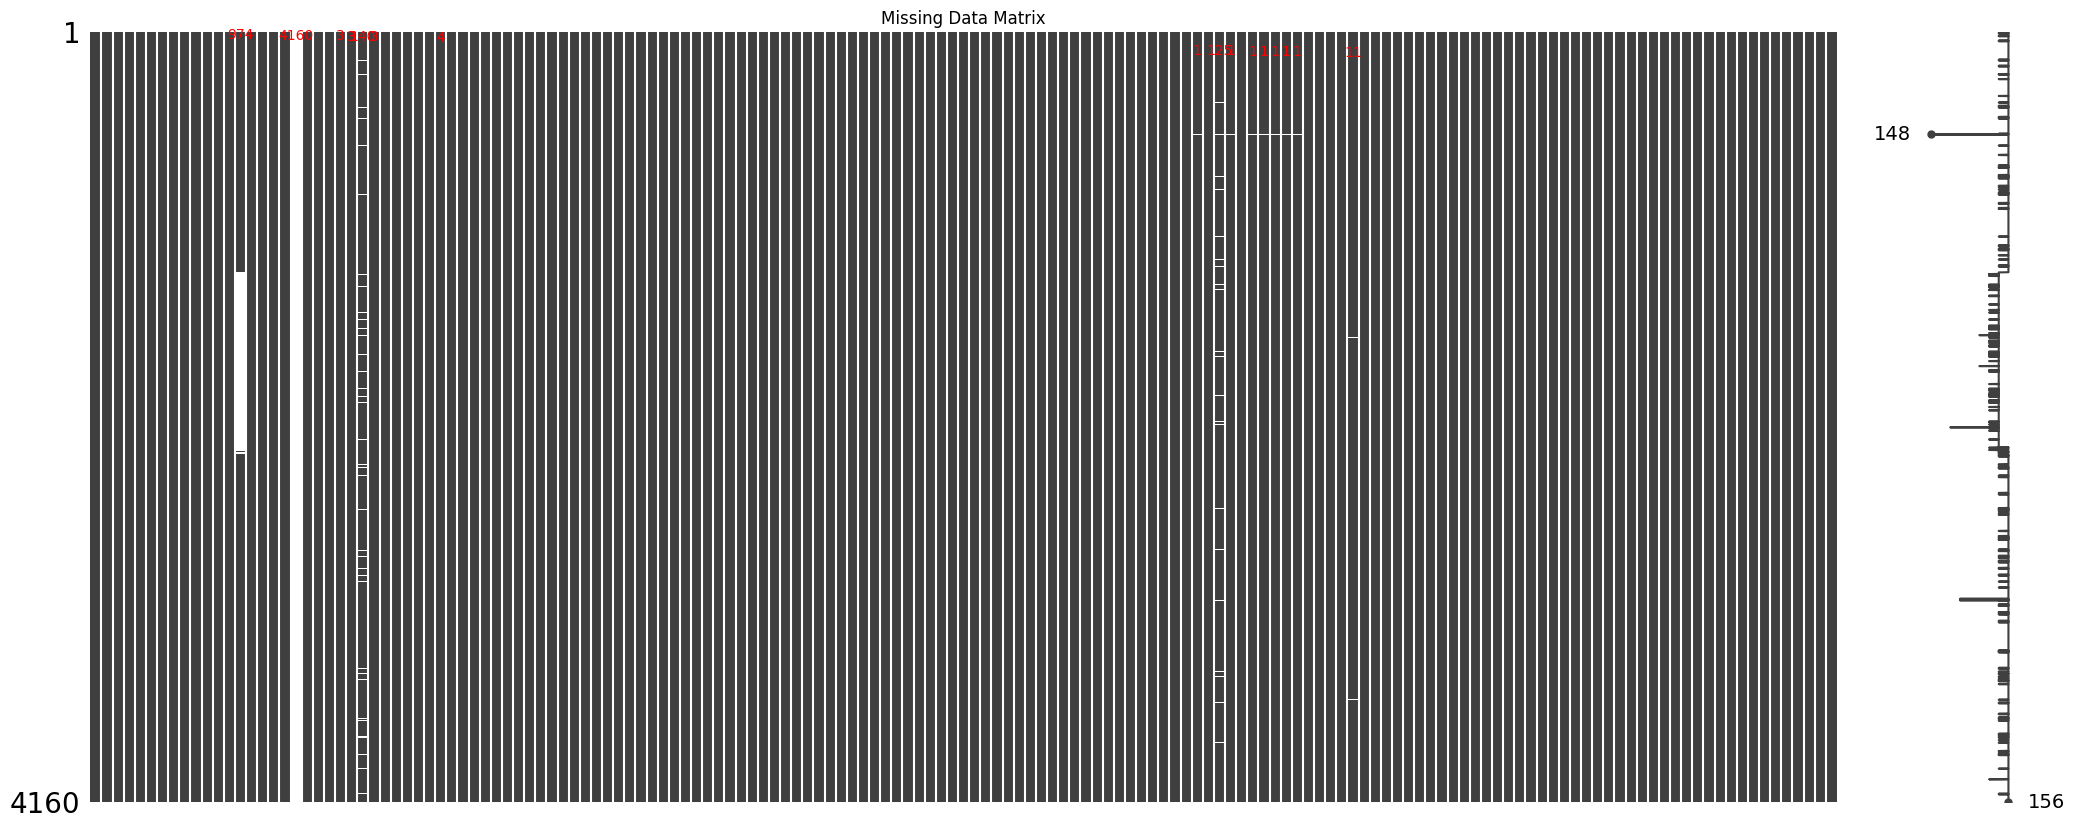

In [14]:
import missingno as msno
import matplotlib.pyplot as plt

# Visualize null values
msno.matrix(matches)
plt.title('Missing Data Matrix')

# Annotate the plot with null value counts
null_counts = matches.isnull().sum()
for i, count in enumerate(null_counts):
    if count > 0:
        plt.text(i, i, f'{count}', va='center', ha='center', color='red')
        print(f'Column {null_counts.index[i]} has {count} null value(s)')

plt.show()


In [15]:
matches.head()

,date,time,comp,round,day,venue,result,gf,ga_x,opponent,...,lost,blocks_y,sh,pass,int,tkl+int,clr,err,season,team
0,17-08-2018,22:15,La Liga,Matchweek 1,Fri,Home,L,0,3,Levante,...,13,7,0,7,9,34,16,0,2020,Real Betis
0,17-08-2018,22:15,La Liga,Matchweek 1,Fri,Away,W,3,0,Betis,...,17,7,4,3,10,24,35,0,2020,Levante
0,17-08-2018,20:15,La Liga,Matchweek 1,Fri,Away,D,0,0,Girona,...,16,8,2,6,10,37,33,0,2020,Valladolid
0,17-08-2018,20:15,La Liga,Matchweek 1,Fri,Home,D,0,0,Valladolid,...,9,4,0,4,13,25,14,0,2020,Girona
1,18-08-2018,22:15,La Liga,Matchweek 1,Sat,Home,W,3,0,Alavés,...,4,2,1,1,6,13,3,1,2020,Barcelona


In [16]:
matches.shape

(4160, 157)

In [17]:
matches.isnull().sum()

date       0
time       0
comp       0
round      0
day        0
          ..
tkl+int    0
clr        0
err        0
season     0
team       0
Length: 157, dtype: int64

In [18]:
matches = matches.drop(['notes'],axis=1)

In [19]:
matches.isnull().sum()

date       0
time       0
comp       0
round      0
day        0
          ..
tkl+int    0
clr        0
err        0
season     0
team       0
Length: 156, dtype: int64

In [20]:
matches['attendance'] = matches['attendance'].fillna(matches['attendance'].mean())

Column sot% has been filled with 0
Column g/sh has been filled with 0
Column g/sot has been filled with 0
Column dist has been filled with 0
Column npxg/sh has been filled with 0
Column ga_y.1 has been filled with 0
Column save% has been filled with 0
Column cs has been filled with 0
Column psxg+/- has been filled with 0
Column pkatt_y has been filled with 0
Column pka has been filled with 0
Column pksv has been filled with 0
Column pkm has been filled with 0
Column cmp%_y has been filled with 0


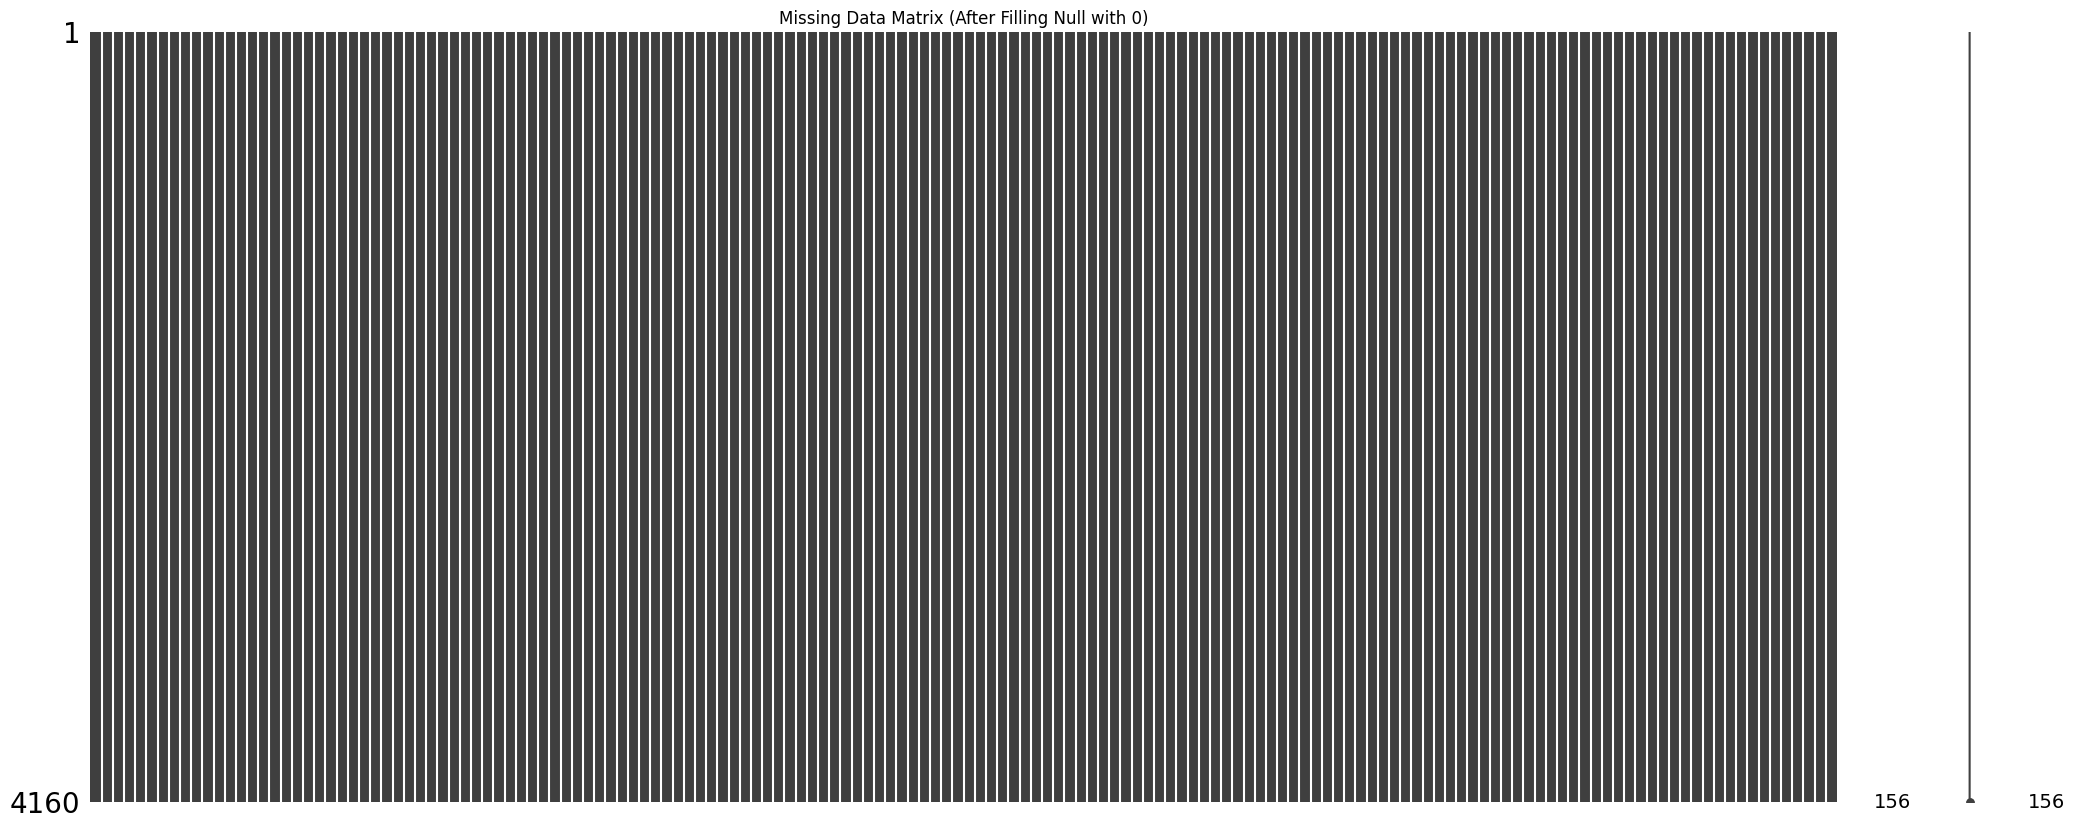

In [22]:
columns_with_null = ['sot%', 'g/sh', 'g/sot', 'dist', 'npxg/sh', 'ga_y.1', 'save%', 'cs', 'psxg+/-', 'pkatt_y', 'pka', 'pksv', 'pkm', 'cmp%_y']

# Fill null values with 0 for the specified columns
matches[columns_with_null] = matches[columns_with_null].fillna(0)

# Verify if null values are filled with 0
null_counts_after_fill = matches[columns_with_null].isnull().sum()
for i, count in enumerate(null_counts_after_fill):
    if count == 0:
        print(f'Column {null_counts_after_fill.index[i]} has been filled with 0')

# Visualize null values after filling
msno.matrix(matches)
plt.title('Missing Data Matrix (After Filling Null with 0)')
plt.show()


In [23]:
matches = matches.dropna()

In [24]:
matches.isnull().sum()

date       0
time       0
comp       0
round      0
day        0
          ..
tkl+int    0
clr        0
err        0
season     0
team       0
Length: 156, dtype: int64

In [25]:
matches["team"].value_counts()

team
Real Betis         227
Real Sociedad      227
Athletic Club      227
Sevilla            227
Real Madrid        227
Valencia           227
Villarreal         227
Barcelona          227
Atletico Madrid    227
Celta Vigo         189
Getafe             189
Osasuna            189
Alaves             152
Levante            152
Espanyol           151
Valladolid         151
Granada            114
Eibar              114
Rayo Vallecano     113
Mallorca           113
Cadiz              113
Elche              113
Leganes             76
Huesca              76
Girona              75
Almeria             37
Name: count, dtype: int64

In [26]:
matches.columns

Index(['date', 'time', 'comp', 'round', 'day', 'venue', 'result', 'gf', 'ga_x',
       'opponent',
       ...
       'lost', 'blocks_y', 'sh', 'pass', 'int', 'tkl+int', 'clr', 'err',
       'season', 'team'],
      dtype='object', length=156)

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Summary statistics
print(matches.describe())



                gf         ga_x         xg_x          xga      poss_x   
count  4160.000000  4160.000000  4160.000000  4160.000000  4160.00000  \
mean      1.277644     1.238462     1.279543     1.251034    50.34375   
std       1.167023     1.143623     0.774275     0.762334    11.39695   
min       0.000000     0.000000     0.000000     0.000000    18.00000   
25%       0.000000     0.000000     0.700000     0.700000    42.00000   
50%       1.000000     1.000000     1.100000     1.100000    50.00000   
75%       2.000000     2.000000     1.700000     1.700000    58.00000   
max       8.000000     8.000000     5.300000     5.300000    82.00000   

         attendance          gls         sh_x          sot         sot%  ...   
count   4160.000000  4160.000000  4160.000000  4160.000000  4160.000000  ...  \
mean   27187.969554     1.242548    11.554087     3.805769    33.458413  ...   
std    16324.915487     1.153965     4.744591     2.268737    16.273937  ...   
min       13.000000   

In [15]:
matches.columns

Index(['date', 'time', 'comp', 'round', 'day', 'venue', 'result', 'gf', 'ga_x',
       'opponent',
       ...
       'lost', 'blocks_y', 'sh', 'pass', 'int', 'tkl+int', 'clr', 'err',
       'season', 'team'],
      dtype='object', length=156)

In [16]:
matches[matches["team"] == "Barcelona"].sort_values("date")

,date,time,comp,round,day,venue,result,gf,ga_x,opponent,...,lost,blocks_y,sh,pass,int,tkl+int,clr,err,season,team
29,01-02-2023,21:00,La Liga,Matchweek 17,Wed,Away,W,2,1,Betis,...,11,12,2,10,7,30,8,0,2019,Barcelona
36,01-03-2020,21:00,La Liga,Matchweek 26,Sun,Away,L,0,2,Real Madrid,...,15,10,2,8,13,32,18,1,2021,Barcelona
40,01-04-2023,21:00,La Liga,Matchweek 27,Sat,Away,W,4,0,Elche,...,12,15,7,8,7,18,35,0,2019,Barcelona
48,01-05-2022,21:00,La Liga,Matchweek 34,Sun,Home,W,2,1,Mallorca,...,6,8,2,6,8,25,4,0,2018,Barcelona
48,01-05-2022,21:00,La Liga,Matchweek 34,Sun,Home,W,2,1,Mallorca,...,6,8,2,6,8,25,4,0,2023,Barcelona
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,30-10-2021,21:00,La Liga,Matchweek 12,Sat,Home,D,1,1,Alavés,...,5,6,0,6,5,12,7,0,2023,Barcelona
13,30-10-2021,21:00,La Liga,Matchweek 12,Sat,Home,D,1,1,Alavés,...,5,6,0,6,5,12,7,0,2018,Barcelona
29,31-01-2021,21:00,La Liga,Matchweek 21,Sun,Home,W,2,1,Athletic Club,...,3,12,3,9,7,17,13,0,2022,Barcelona
2,31-08-2019,17:00,La Liga,Matchweek 3,Sat,Away,D,2,2,Osasuna,...,9,5,3,2,6,22,16,0,2021,Barcelona


In [17]:
matches["round"].value_counts()

round
Matchweek 30    109
Matchweek 22    109
Matchweek 32    109
Matchweek 14    109
Matchweek 26    109
Matchweek 9     109
Matchweek 17    108
Matchweek 33    108
Matchweek 13    108
Matchweek 35    108
Matchweek 25    108
Matchweek 34    108
Matchweek 7     108
Matchweek 29    108
Matchweek 6     107
Matchweek 37    107
Matchweek 18    107
Matchweek 19    107
Matchweek 27    106
Matchweek 16    106
Matchweek 15    106
Matchweek 11    106
Matchweek 10    106
Matchweek 8     106
Matchweek 36    106
Matchweek 23    105
Matchweek 24    105
Matchweek 28    105
Matchweek 4     105
Matchweek 1     105
Matchweek 20    104
Matchweek 21    103
Matchweek 5     103
Matchweek 3     103
Matchweek 31    102
Matchweek 2     102
Matchweek 12    102
Matchweek 38     89
Name: count, dtype: int64

In [18]:
matches.dtypes

date       object
time       object
comp       object
round      object
day        object
            ...  
tkl+int     int64
clr         int64
err         int64
season      int64
team       object
Length: 156, dtype: object

In [19]:
#matches["date"] = pd.to_datetime(matches["date"])

In [20]:
matches["target"] = (matches["result"] == "W").astype("int")

In [21]:
matches

,date,time,comp,round,day,venue,result,gf,ga_x,opponent,...,blocks_y,sh,pass,int,tkl+int,clr,err,season,team,target
0,17-08-2018,22:15,La Liga,Matchweek 1,Fri,Home,L,0,3,Levante,...,7,0,7,9,34,16,0,2020,Real Betis,0
0,17-08-2018,22:15,La Liga,Matchweek 1,Fri,Away,W,3,0,Betis,...,7,4,3,10,24,35,0,2020,Levante,1
0,17-08-2018,20:15,La Liga,Matchweek 1,Fri,Away,D,0,0,Girona,...,8,2,6,10,37,33,0,2020,Valladolid,0
0,17-08-2018,20:15,La Liga,Matchweek 1,Fri,Home,D,0,0,Valladolid,...,4,0,4,13,25,14,0,2020,Girona,0
0,18-08-2018,18:15,La Liga,Matchweek 1,Sat,Away,D,1,1,Celta Vigo,...,6,2,4,13,38,20,0,2020,Espanyol,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,28-05-2023,19:00,La Liga,Matchweek 37,Sun,Home,D,0,0,Valladolid,...,18,4,14,7,28,24,0,2019,Almeria,0
39,28-05-2023,19:00,La Liga,Matchweek 37,Sun,Away,L,0,1,Cádiz,...,13,4,9,7,26,25,0,2019,Celta Vigo,0
39,28-05-2023,19:00,La Liga,Matchweek 37,Sun,Away,D,0,0,Almería,...,13,6,7,1,17,18,0,2019,Valladolid,0
40,28-05-2023,19:00,La Liga,Matchweek 37,Sun,Away,D,2,2,Valencia,...,14,6,8,8,25,29,0,2019,Espanyol,0


In [22]:
matches["venue_code"] = matches["venue"].astype("category").cat.codes

In [23]:
matches["opp_code"] = matches["opponent"].astype("category").cat.codes

In [24]:
matches["hour"] = matches["time"].str.replace(":.+", "", regex=True).astype("int")

In [25]:
#matches["day_code"] = matches["date"].dt.dayofweek

In [26]:
matches

,date,time,comp,round,day,venue,result,gf,ga_x,opponent,...,int,tkl+int,clr,err,season,team,target,venue_code,opp_code,hour
0,17-08-2018,22:15,La Liga,Matchweek 1,Fri,Home,L,0,3,Levante,...,9,34,16,0,2020,Real Betis,0,1,16,22
0,17-08-2018,22:15,La Liga,Matchweek 1,Fri,Away,W,3,0,Betis,...,10,24,35,0,2020,Levante,1,0,5,22
0,17-08-2018,20:15,La Liga,Matchweek 1,Fri,Away,D,0,0,Girona,...,10,37,33,0,2020,Valladolid,0,0,12,20
0,17-08-2018,20:15,La Liga,Matchweek 1,Fri,Home,D,0,0,Valladolid,...,13,25,14,0,2020,Girona,0,1,24,20
0,18-08-2018,18:15,La Liga,Matchweek 1,Sat,Away,D,1,1,Celta Vigo,...,13,38,20,0,2020,Espanyol,0,0,6,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,28-05-2023,19:00,La Liga,Matchweek 37,Sun,Home,D,0,0,Valladolid,...,7,28,24,0,2019,Almeria,0,1,24,19
39,28-05-2023,19:00,La Liga,Matchweek 37,Sun,Away,L,0,1,Cádiz,...,7,26,25,0,2019,Celta Vigo,0,0,7,19
39,28-05-2023,19:00,La Liga,Matchweek 37,Sun,Away,D,0,0,Almería,...,1,17,18,0,2019,Valladolid,0,0,1,19
40,28-05-2023,19:00,La Liga,Matchweek 37,Sun,Away,D,2,2,Valencia,...,8,25,29,0,2019,Espanyol,0,0,23,19


In [84]:
matches['gf']

0     0
0     3
0     0
0     0
0     1
     ..
37    0
39    0
39    0
40    2
39    1
Name: gf, Length: 4021, dtype: int64

In [87]:
train_df['xag']

0       0.4
1       1.3
2       0.4
3       3.3
4       0.6
       ... 
2142    0.8
2143    0.4
2144    0.5
2145    0.2
2146    0.5
Name: xag, Length: 2147, dtype: float64

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Define the attribute groups
defense_cols = ['tkl','tkl','tklw','def 3rd_y','mid 3rd_y','att 3rd_y','tkl','tkl','atta_y','tkl%','lost','blocks_y']
gca_cols = ['gca', 'passlive', 'passlive', 'passdead', 'passdead', 'to', 'to', 'sh_y', 'sh_y', 'fld', 'fld', 'def', 'def']
keeper_cols = ['sota', 'ga_y', 'ga_y', 'saves', 'save%', 'cs', 'psxg', 'psxg+/-', 'pkatt_y', 'pka', 'pksv', 'pkm', 'cmp', 'att', 'att', 'att', 'cmp%_y']
pass_types_cols = ['att_y', 'live_x', 'dead', 'fk_y', 'tb', 'sw', 'crs', 'ti', 'ck', 'in', 'out', 'str', 'cmp_y', 'off', 'blocks_x']
passing_cols = ['cmp_x', 'cmp_x', 'cmp_x', 'cmp_x', 'att_x', 'att_x', 'att_x', 'att_x', 'cmp%_x', 'cmp%_x', 'cmp%_x', 'cmp%_x', 'totdist_x', 'prgdist_x', 'ast', 'xag', 'xa', 'kp', '1/3_x', 'ppa', 'crspa', 'prgp']
shooting_cols = ['gls', 'sh_x', 'sot', 'sot%', 'g/sh', 'g/sot', 'dist', 'fk_x', 'pk', 'pkatt_x', 'xg_y', 'npxg', 'npxg/sh', 'g-xg', 'np:g-xg']

# Create a new DataFrame for selected features
selected_features_df = pd.DataFrame()

# Encode the target variable
label_encoder = LabelEncoder()
matches['result_encoded'] = label_encoder.fit_transform(matches['result'])

# Feature selection for each attribute group
for cols in [defense_cols, gca_cols, keeper_cols, pass_types_cols, passing_cols, shooting_cols]:
    X = matches[cols].copy()
    y = matches['result_encoded'].copy()

    # Train a random forest model
    model = RandomForestRegressor()
    model.fit(X, y)

    # Get feature importances
    importances = model.feature_importances_

    # Select top features (e.g., top 5)
    top_features = sorted(zip(importances, cols), reverse=True)[:7]
    selected_cols = [col for _, col in top_features]

    # Add selected features to the new DataFrame
    selected_features_df = pd.concat([selected_features_df, matches[selected_cols]], axis=1)




In [35]:
print(selected_features_df.columns)

Index(['tkl%', 'blocks_y', 'tklw', 'atta_y', 'def 3rd_y', 'mid 3rd_y',
       'att 3rd_y', 'gca', 'passlive', 'passlive', 'passdead', 'passdead',
       'to', 'to', 'cmp%_y', 'psxg', 'psxg+/-', 'cmp', 'att', 'att', 'att',
       'crs', 'cmp_y', 'dead', 'ti', 'fk_y', 'att_y', 'live_x', 'ast',
       'prgdist_x', 'prgp', 'totdist_x', '1/3_x', 'xag', 'ppa', 'gls', 'dist',
       'sot%', 'npxg/sh', 'sh_x', 'g/sh', 'npxg'],
      dtype='object')


In [36]:


# Select the desired columns from the "matches" DataFrame
selected_columns = ['date', 'time', 'comp','opponent', 'round', 'day', 'venue', 'result', 'season', 'team']
selected_columns += ['tkl%', 'blocks_y', 'tklw', 'atta_y', 'def 3rd_y', 'mid 3rd_y',
       'att 3rd_y', 'gca', 'passlive', 'passlive', 'passdead', 'passdead',
       'to', 'to', 'cmp%_y', 'psxg', 'psxg+/-', 'cmp', 'att', 'att', 'att',
       'crs', 'cmp_y', 'dead', 'fk_y', 'ti', 'live_x', 'att_y', 'ast',
       'prgdist_x', 'prgp', 'totdist_x', '1/3_x', 'xag', 'ppa', 'gls', 'dist',
       'sot%', 'npxg/sh', 'sh_x', 'g/sh', 'xg_y']
# Create the new DataFrame with the selected columns
new_df = matches[selected_columns].copy()

# Print the new DataFrame
new_df


,date,time,comp,opponent,round,day,venue,result,season,team,...,1/3_x,xag,ppa,gls,dist,sot%,npxg/sh,sh_x,g/sh,xg_y
0,17-08-2018,22:15,La Liga,Levante,Matchweek 1,Fri,Home,L,2020,Real Betis,...,60,0.6,13,0,21.7,36.4,0.04,22,0.00,0.9
0,17-08-2018,22:15,La Liga,Betis,Matchweek 1,Fri,Away,W,2020,Levante,...,14,1.8,1,3,12.5,66.7,0.42,6,0.50,2.5
0,17-08-2018,20:15,La Liga,Girona,Matchweek 1,Fri,Away,D,2020,Valladolid,...,12,0.0,0,0,30.8,50.0,0.02,2,0.00,0.0
0,17-08-2018,20:15,La Liga,Valladolid,Matchweek 1,Fri,Home,D,2020,Girona,...,57,0.6,12,0,20.9,7.7,0.06,13,0.00,0.7
1,18-08-2018,22:15,La Liga,Alavés,Matchweek 1,Sat,Home,W,2020,Barcelona,...,77,2.4,23,3,16.2,36.0,0.13,25,0.12,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,28-05-2023,19:00,La Liga,Valladolid,Matchweek 37,Sun,Home,D,2019,Almeria,...,27,1.4,11,0,18.4,30.4,0.07,23,0.00,1.7
39,28-05-2023,19:00,La Liga,Cádiz,Matchweek 37,Sun,Away,L,2019,Celta Vigo,...,33,0.4,7,0,20.3,44.4,0.07,9,0.00,0.6
39,28-05-2023,19:00,La Liga,Almería,Matchweek 37,Sun,Away,D,2019,Valladolid,...,39,0.4,4,0,21.0,25.0,0.06,8,0.00,0.5
40,28-05-2023,19:00,La Liga,Valencia,Matchweek 37,Sun,Away,D,2019,Espanyol,...,23,0.2,5,2,15.4,55.6,0.13,9,0.22,1.2


In [37]:
new_df = new_df.drop('round',axis=1)
new_df = new_df.drop('day',axis=1)
new_df = new_df.drop('comp',axis=1)

In [38]:
#new_df2 = new_df[new_df['team']=="Barcelona"]

In [39]:
new_df

,date,time,opponent,venue,result,season,team,tkl%,blocks_y,tklw,...,1/3_x,xag,ppa,gls,dist,sot%,npxg/sh,sh_x,g/sh,xg_y
0,17-08-2018,22:15,Levante,Home,L,2020,Real Betis,50.0,7,14,...,60,0.6,13,0,21.7,36.4,0.04,22,0.00,0.9
0,17-08-2018,22:15,Betis,Away,W,2020,Levante,32.0,7,7,...,14,1.8,1,3,12.5,66.7,0.42,6,0.50,2.5
0,17-08-2018,20:15,Girona,Away,D,2020,Valladolid,46.7,8,15,...,12,0.0,0,0,30.8,50.0,0.02,2,0.00,0.0
0,17-08-2018,20:15,Valladolid,Home,D,2020,Girona,35.7,4,8,...,57,0.6,12,0,20.9,7.7,0.06,13,0.00,0.7
1,18-08-2018,22:15,Alavés,Home,W,2020,Barcelona,50.0,2,4,...,77,2.4,23,3,16.2,36.0,0.13,25,0.12,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,28-05-2023,19:00,Valladolid,Home,D,2019,Almeria,61.9,18,10,...,27,1.4,11,0,18.4,30.4,0.07,23,0.00,1.7
39,28-05-2023,19:00,Cádiz,Away,L,2019,Celta Vigo,50.0,13,11,...,33,0.4,7,0,20.3,44.4,0.07,9,0.00,0.6
39,28-05-2023,19:00,Almería,Away,D,2019,Valladolid,35.0,13,11,...,39,0.4,4,0,21.0,25.0,0.06,8,0.00,0.5
40,28-05-2023,19:00,Valencia,Away,D,2019,Espanyol,33.3,14,11,...,23,0.2,5,2,15.4,55.6,0.13,9,0.22,1.2


In [42]:
# Convert the "season" column to datetime
#new_df['season'] = pd.to_datetime(new_df['season'])
from sklearn.model_selection import train_test_split
cutoff_date = pd.to_datetime("01-07-2022", format="%d-%m-%Y")

# Convert 'date' column to Timestamp type
new_df['date'] = pd.to_datetime(new_df['date'], format="%d-%m-%Y")

# Filter the data based on the cutoff date
train_df = new_df[new_df['date'] <= cutoff_date]
test_df = new_df[new_df['date'] > cutoff_date]

# Filter the data based on the cutoff date
train_df = new_df[new_df['date'] <= cutoff_date]
test_df = new_df[new_df['date'] > cutoff_date]

# Split the train set into train and validation sets with an 80/20 ratio
train_df, val_df = train_test_split(train_df, test_size=0.3, random_state=32)

# Reset the index for all sets
train_df.reset_index(drop=True, inplace=True)
val_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

# Print the shapes of the train, validation, and test sets
print("Train set shape:", train_df.shape)
print("Validation set shape:", val_df.shape)
print("Test set shape:", test_df.shape)

Train set shape: (2394, 49)
Validation set shape: (1026, 49)
Test set shape: (740, 49)


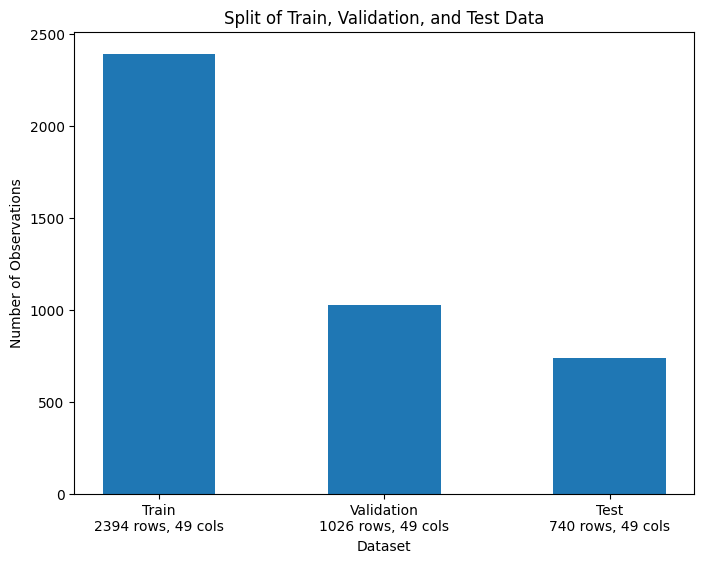

In [49]:
import matplotlib.pyplot as plt

# Define the labels and sizes for the bar chart
labels = ['Train\n{} rows, {} cols'.format(train_df.shape[0], train_df.shape[1]),
          'Validation\n{} rows, {} cols'.format(val_df.shape[0], val_df.shape[1]),
          'Test\n{} rows, {} cols'.format(test_df.shape[0], test_df.shape[1])]
sizes = [train_df.shape[0], val_df.shape[0], test_df.shape[0]]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, sizes,width=0.5)
plt.xlabel('Dataset')
plt.ylabel('Number of Observations')
plt.title('Split of Train, Validation, and Test Data')
plt.show()


In [50]:
duplicate_columns = train_df.columns[train_df.columns.duplicated()]
train_df = train_df.loc[:, ~train_df.columns.duplicated()]


# Check for duplicate column names in test_df
duplicate_columns_test = test_df.columns[test_df.columns.duplicated()]
test_df = test_df.loc[:, ~test_df.columns.duplicated()]

# Check for duplicate column names in val_df
duplicate_columns_val = val_df.columns[val_df.columns.duplicated()]
val_df = val_df.loc[:, ~val_df.columns.duplicated()]


In [51]:
import category_encoders as ce

# Create an OrdinalEncoder object
ordinal_encoder = ce.OrdinalEncoder(cols=['opponent', 'venue'])

# Apply ordinal encoding to train_df
train_df = ordinal_encoder.fit_transform(train_df)

# Apply ordinal encoding to val_df
val_df = ordinal_encoder.transform(val_df)

# Apply ordinal encoding to test_df
test_df = ordinal_encoder.transform(test_df)


In [52]:
val_df['venue']

0       2
1       2
2       1
3       2
4       1
       ..
1021    2
1022    1
1023    1
1024    1
1025    2
Name: venue, Length: 1026, dtype: int64

In [53]:
val_df.count()

date         1026
time         1026
opponent     1026
venue        1026
result       1026
season       1026
team         1026
tkl%         1026
blocks_y     1026
tklw         1026
atta_y       1026
def 3rd_y    1026
mid 3rd_y    1026
att 3rd_y    1026
gca          1026
passlive     1026
passdead     1026
to           1026
cmp%_y       1026
psxg         1026
psxg+/-      1026
cmp          1026
att          1026
crs          1026
cmp_y        1026
dead         1026
fk_y         1026
ti           1026
live_x       1026
att_y        1026
ast          1026
prgdist_x    1026
prgp         1026
totdist_x    1026
1/3_x        1026
xag          1026
ppa          1026
gls          1026
dist         1026
sot%         1026
npxg/sh      1026
sh_x         1026
g/sh         1026
xg_y         1026
dtype: int64

In [54]:
import datetime

# Convert the date column to datetime format
train_df['date'] = pd.to_datetime(train_df['date'], dayfirst=True)
val_df['date'] = pd.to_datetime(val_df['date'], dayfirst=True)
# Define the cutoff date
cutoff_date = datetime.datetime(2022, 7, 1)

# Filter the dataframe to keep rows with date <= cutoff_date
train_df = train_df[train_df['date'] <= cutoff_date]
val_df = val_df[val_df['date'] <= cutoff_date]
# Reset the index of the dataframe
train_df.reset_index(drop=True, inplace=True)

# Print the updated dataframe
train_df


,date,time,opponent,venue,result,season,team,tkl%,blocks_y,tklw,...,1/3_x,xag,ppa,gls,dist,sot%,npxg/sh,sh_x,g/sh,xg_y
0,2019-04-24,20:30,1,1,D,2020,Celta Vigo,28.6,9,7,...,24,1.8,8,1,13.7,33.3,0.16,18,0.06,2.7
1,2021-12-12,18:30,2,2,W,2023,Real Betis,60.0,9,16,...,22,1.5,8,4,16.5,45.5,0.14,11,0.36,1.6
2,2019-02-24,20:45,3,2,L,2020,Levante,29.4,22,7,...,22,1.1,8,1,13.2,18.2,0.12,11,0.09,1.2
3,2019-09-15,18:30,4,1,D,2021,Osasuna,31.6,15,12,...,33,2.4,11,1,18.6,29.4,0.15,17,0.06,2.5
4,2022-02-19,16:15,5,2,L,2018,Osasuna,36.4,5,6,...,49,0.5,13,0,18.9,28.6,0.04,14,0.00,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2389,2021-04-21,22:00,9,1,W,2022,Real Madrid,21.1,12,9,...,30,2.2,14,3,17.2,23.1,0.19,13,0.15,3.2
2390,2022-02-05,14:00,12,1,L,2023,Alaves,53.3,7,9,...,17,0.8,4,1,16.1,33.3,0.15,6,0.17,0.9
2391,2020-06-17,19:30,14,2,D,2021,Eibar,42.9,8,7,...,25,1.1,5,2,20.1,45.5,0.12,11,0.09,2.1
2392,2020-09-30,21:30,12,2,L,2022,Eibar,39.1,11,12,...,48,0.4,9,0,21.7,36.4,0.04,11,0.00,1.2


In [55]:
print(train_df['result'].value_counts())
print(val_df['result'].value_counts())
print(test_df['result'].value_counts())

result
W    887
L    819
D    688
Name: count, dtype: int64
result
W    373
L    360
D    293
Name: count, dtype: int64
result
W    287
L    287
D    166
Name: count, dtype: int64


In [56]:
new_df

,date,time,opponent,venue,result,season,team,tkl%,blocks_y,tklw,...,1/3_x,xag,ppa,gls,dist,sot%,npxg/sh,sh_x,g/sh,xg_y
0,2018-08-17,22:15,Levante,Home,L,2020,Real Betis,50.0,7,14,...,60,0.6,13,0,21.7,36.4,0.04,22,0.00,0.9
0,2018-08-17,22:15,Betis,Away,W,2020,Levante,32.0,7,7,...,14,1.8,1,3,12.5,66.7,0.42,6,0.50,2.5
0,2018-08-17,20:15,Girona,Away,D,2020,Valladolid,46.7,8,15,...,12,0.0,0,0,30.8,50.0,0.02,2,0.00,0.0
0,2018-08-17,20:15,Valladolid,Home,D,2020,Girona,35.7,4,8,...,57,0.6,12,0,20.9,7.7,0.06,13,0.00,0.7
1,2018-08-18,22:15,Alavés,Home,W,2020,Barcelona,50.0,2,4,...,77,2.4,23,3,16.2,36.0,0.13,25,0.12,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,2023-05-28,19:00,Valladolid,Home,D,2019,Almeria,61.9,18,10,...,27,1.4,11,0,18.4,30.4,0.07,23,0.00,1.7
39,2023-05-28,19:00,Cádiz,Away,L,2019,Celta Vigo,50.0,13,11,...,33,0.4,7,0,20.3,44.4,0.07,9,0.00,0.6
39,2023-05-28,19:00,Almería,Away,D,2019,Valladolid,35.0,13,11,...,39,0.4,4,0,21.0,25.0,0.06,8,0.00,0.5
40,2023-05-28,19:00,Valencia,Away,D,2019,Espanyol,33.3,14,11,...,23,0.2,5,2,15.4,55.6,0.13,9,0.22,1.2


In [57]:
train_df.head()

,date,time,opponent,venue,result,season,team,tkl%,blocks_y,tklw,...,1/3_x,xag,ppa,gls,dist,sot%,npxg/sh,sh_x,g/sh,xg_y
0,2019-04-24,20:30,1,1,D,2020,Celta Vigo,28.6,9,7,...,24,1.8,8,1,13.7,33.3,0.16,18,0.06,2.7
1,2021-12-12,18:30,2,2,W,2023,Real Betis,60.0,9,16,...,22,1.5,8,4,16.5,45.5,0.14,11,0.36,1.6
2,2019-02-24,20:45,3,2,L,2020,Levante,29.4,22,7,...,22,1.1,8,1,13.2,18.2,0.12,11,0.09,1.2
3,2019-09-15,18:30,4,1,D,2021,Osasuna,31.6,15,12,...,33,2.4,11,1,18.6,29.4,0.15,17,0.06,2.5
4,2022-02-19,16:15,5,2,L,2018,Osasuna,36.4,5,6,...,49,0.5,13,0,18.9,28.6,0.04,14,0.00,0.6


In [58]:
val_df.head()

,date,time,opponent,venue,result,season,team,tkl%,blocks_y,tklw,...,1/3_x,xag,ppa,gls,dist,sot%,npxg/sh,sh_x,g/sh,xg_y
0,2022-01-22,16:15,21,2,W,2023,Villarreal,10.5,8,8,...,33,0.9,5,2,20.4,45.5,0.10,11,0.09,1.9
1,2020-07-16,21:00,1,2,W,2021,Valencia,44.4,4,8,...,25,1.3,3,1,18.9,33.3,0.15,9,0.11,1.4
2,2019-08-30,22:00,14,1,L,2021,Real Sociedad,45.5,6,9,...,27,0.2,6,0,19.8,100.0,0.08,2,0.00,0.2
3,2021-12-31,16:15,1,2,L,2023,Valencia,63.6,14,8,...,17,0.5,10,1,17.2,8.3,0.06,12,0.08,0.7
4,2022-05-14,18:30,1,1,D,2018,Valencia,23.5,5,6,...,36,0.5,7,1,17.6,27.8,0.09,18,0.06,1.6


In [59]:
test_df.head()

,date,time,opponent,venue,result,season,team,tkl%,blocks_y,tklw,...,1/3_x,xag,ppa,gls,dist,sot%,npxg/sh,sh_x,g/sh,xg_y
0,2022-08-12,21:00,16.0,2,W,2019,Osasuna,45.5,6,7,...,29,0.6,5,2,25.0,36.4,0.07,11,0.09,1.5
1,2022-08-12,21:00,11.0,1,L,2019,Sevilla,70.0,6,8,...,28,0.6,8,1,21.5,30.0,0.09,10,0.10,0.9
2,2022-08-13,21:00,6.0,2,D,2019,Barcelona,41.7,7,10,...,42,1.2,17,0,17.0,23.8,0.09,21,0.00,1.9
3,2022-08-13,19:00,4.0,1,W,2019,Villarreal,42.9,7,10,...,27,1.1,10,3,15.1,40.0,0.15,10,0.30,1.5
4,2022-08-13,21:00,19.0,1,D,2019,Rayo Vallecano,46.2,13,15,...,14,0.2,3,0,16.1,50.0,0.13,4,0.00,0.5


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score



# Continue with the remaining steps
X = new_df.drop(["result", "season", "time",'team'], axis=1)
y = new_df["result"]

#train_data = new_df[new_df['date'].dt.year < 2022]
#test_data = new_df[new_df['date'].dt.year == 2022]

# ... Rest of the code

X_train, X_test = train_df.drop(["date", "result", "season", "time",'team'], axis=1), val_df.drop(["date", "result", "season", "time",'team'], axis=1)
y_train, y_test = train_df["result"], val_df["result"]

# Step 4: Train a Decision Tree classifier on the training set
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Step 5: Evaluate the model on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.9132553606237817


In [63]:
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Encode the target variable 'result' using LabelEncoder
label_encoder = LabelEncoder()
train_df['result_encoded'] = label_encoder.fit_transform(train_df['result'])
val_df['result_encoded'] = label_encoder.fit_transform(val_df['result'])
test_df['result_encoded'] = label_encoder.fit_transform(test_df['result'])

# Split the data into features (X) and target variable (y) for training set
X_train = train_df.drop(['result', 'result_encoded', "season", "time", 'team', 'date'], axis=1)
y_train = train_df['result_encoded']

# Create an SVM model
svm_model = SVC()

# Train the SVM model
svm_model.fit(X_train, y_train)

# Preprocess the test data (val_df) and drop unnecessary columns
X_test = val_df.drop(['result','result_encoded', "season", "time", 'team', 'date'], axis=1)
y_test = val_df['result_encoded']

# Predict on the test data
y_pred = svm_model.predict(X_test)

# Evaluate the model on the test data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.41033138401559455


In [64]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Create a Gaussian Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(train_df.drop(['result', 'result_encoded', "season", "time",'team','date'], axis=1), train_df['result_encoded'])

# Predict on the validation set
y_pred = nb_model.predict(val_df.drop(['result', 'result_encoded', "season", "time",'team','date'], axis=1))

# Evaluate the model
accuracy = accuracy_score(val_df['result_encoded'], y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6530214424951267


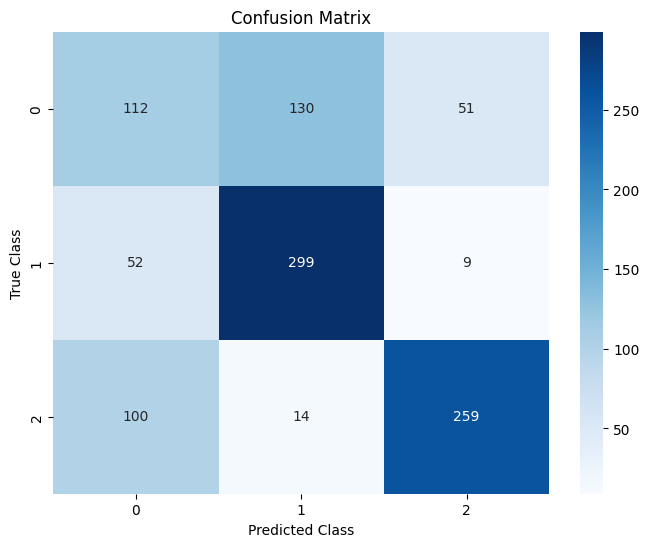

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(val_df['result_encoded'], y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.show()


In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into features (X) and target variable (y)
X_train = train_df.drop(['result_encoded','result', "season", "time",'team','date'], axis=1)
y_train = train_df['result_encoded']

X_val = val_df.drop(['result_encoded','result', "season", "time",'team','date'], axis=1)
y_val = val_df['result_encoded']

# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Predict on the validation set
y_pred = rf_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9327485380116959


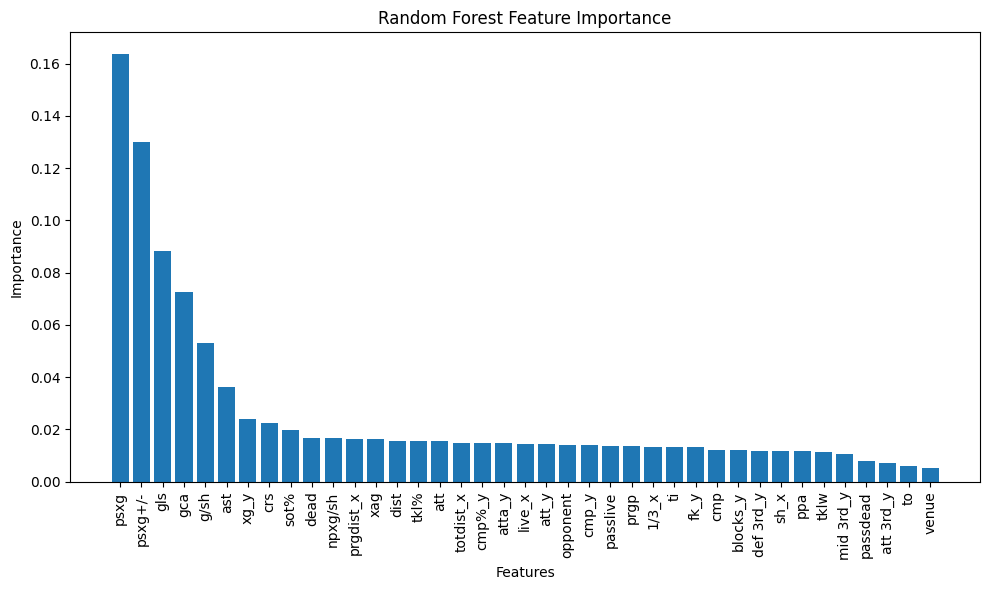

In [67]:
import matplotlib.pyplot as plt

# Get feature importances from the Random Forest model
importances = rf_model.feature_importances_

# Get feature names from the dataset
feature_names = X_train.columns

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances)
plt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()


In [70]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import xgboost as xgb
import matplotlib.pyplot as plt

duplicate_columns = train_df.columns[train_df.columns.duplicated()]
train_df = train_df.loc[:, ~train_df.columns.duplicated()]

# Check for duplicate column names in test_df
duplicate_columns_test = test_df.columns[test_df.columns.duplicated()]
test_df = test_df.loc[:, ~test_df.columns.duplicated()]

# Check for duplicate column names in val_df
duplicate_columns_val = val_df.columns[val_df.columns.duplicated()]
val_df = val_df.loc[:, ~val_df.columns.duplicated()]

# Split the data into features (X) and target variable (y)
X_train = train_df.drop(['result_encoded','result', "season", "time",'team','date'], axis=1)
y_train = train_df['result_encoded']

X_val = val_df.drop(['result_encoded','result', "season", "time",'team','date'], axis=1)
y_val = val_df['result_encoded']

# Create the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_val)
svm_accuracy = accuracy_score(y_val, svm_pred)
svm_precision = precision_score(y_val, svm_pred, average='weighted')
svm_recall = recall_score(y_val, svm_pred, average='weighted')
svm_report = classification_report(y_val, svm_pred)

# Create the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_val)
rf_accuracy = accuracy_score(y_val, rf_pred)
rf_precision = precision_score(y_val, rf_pred, average='weighted')
rf_recall = recall_score(y_val, rf_pred, average='weighted')
rf_report = classification_report(y_val, rf_pred)

# Create the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_val)
dt_accuracy = accuracy_score(y_val, dt_pred)
dt_precision = precision_score(y_val, dt_pred, average='weighted')
dt_recall = recall_score(y_val, dt_pred, average='weighted')
dt_report = classification_report(y_val, dt_pred)

# Create the Gaussian Naive Bayes model
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_pred = gnb_model.predict(X_val)
gnb_accuracy = accuracy_score(y_val, gnb_pred)
gnb_precision = precision_score(y_val, gnb_pred, average='weighted')
gnb_recall = recall_score(y_val, gnb_pred, average='weighted')
gnb_report = classification_report(y_val, gnb_pred)

# Create the XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_val)
xgb_accuracy = accuracy_score(y_val, xgb_pred)
xgb_precision = precision_score(y_val, xgb_pred, average='weighted')
xgb_recall = recall_score(y_val, xgb_pred, average='weighted')
xgb_report = classification_report(y_val, xgb_pred)

/usr/local/Cellar/jupyterlab/3.4.8/libexec/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/Cellar/jupyterlab/3.4.8/libexec/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/Cellar/jupyterlab/3.4.8/libexec/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_s

In [76]:
print("SVM Accuracy:", svm_accuracy)
print("SVM Precision:", svm_precision)
print("SVM Recall:", svm_recall)
print("SVM Report:")
print(svm_report)
print()



SVM Accuracy: 0.41033138401559455
SVM Precision: 0.2970890595814975
SVM Recall: 0.41033138401559455
SVM Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       293
           1       0.40      0.78      0.53       360
           2       0.43      0.38      0.40       373

    accuracy                           0.41      1026
   macro avg       0.28      0.39      0.31      1026
weighted avg       0.30      0.41      0.33      1026




In [72]:
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Precision:", rf_precision)
print("Random Forest Recall:", rf_recall)
print("Random Forest Report:")
print(rf_report)
print()

Random Forest Accuracy: 0.9181286549707602
Random Forest Precision: 0.9173794077610942
Random Forest Recall: 0.9181286549707602
Random Forest Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       293
           1       0.93      0.95      0.94       360
           2       0.93      0.95      0.94       373

    accuracy                           0.92      1026
   macro avg       0.91      0.91      0.91      1026
weighted avg       0.92      0.92      0.92      1026




In [73]:
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Precision:", dt_precision)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree Report:")
print(dt_report)
print()

Decision Tree Accuracy: 0.9200779727095516
Decision Tree Precision: 0.9201326839960826
Decision Tree Recall: 0.9200779727095516
Decision Tree Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       293
           1       0.94      0.92      0.93       360
           2       0.94      0.96      0.95       373

    accuracy                           0.92      1026
   macro avg       0.92      0.92      0.92      1026
weighted avg       0.92      0.92      0.92      1026




In [74]:
print("Gaussian Naive Bayes Accuracy:", gnb_accuracy)
print("Gaussian Naive Bayes Precision:", gnb_precision)
print("Gaussian Naive Bayes Recall:", gnb_recall)
print("Gaussian Naive Bayes Report:")
print(gnb_report)
print()

Gaussian Naive Bayes Accuracy: 0.6530214424951267
Gaussian Naive Bayes Precision: 0.6531442246238108
Gaussian Naive Bayes Recall: 0.6530214424951267
Gaussian Naive Bayes Report:
              precision    recall  f1-score   support

           0       0.42      0.38      0.40       293
           1       0.67      0.83      0.74       360
           2       0.81      0.69      0.75       373

    accuracy                           0.65      1026
   macro avg       0.64      0.64      0.63      1026
weighted avg       0.65      0.65      0.65      1026




In [75]:
print("XGBoost Accuracy:", xgb_accuracy)
print("XGBoost Precision:", xgb_precision)
print("XGBoost Recall:", xgb_recall)
print("XGBoost Report:")
print(xgb_report)

XGBoost Accuracy: 0.9649122807017544
XGBoost Precision: 0.965089874543794
XGBoost Recall: 0.9649122807017544
XGBoost Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       293
           1       0.98      0.97      0.98       360
           2       0.98      0.97      0.97       373

    accuracy                           0.96      1026
   macro avg       0.96      0.96      0.96      1026
weighted avg       0.97      0.96      0.96      1026



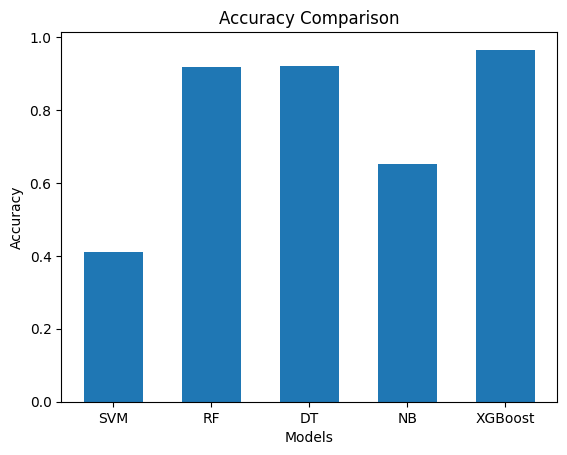

In [93]:

# Plot the accuracies
models = ['SVM', 'RF', 'DT', 'NB', 'XGBoost']
accuracies = [svm_accuracy, rf_accuracy, dt_accuracy, gnb_accuracy, xgb_accuracy]

plt.bar(models, accuracies,width=0.6)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
#plt.xticks(rotation=90, ha='right')
plt.show()



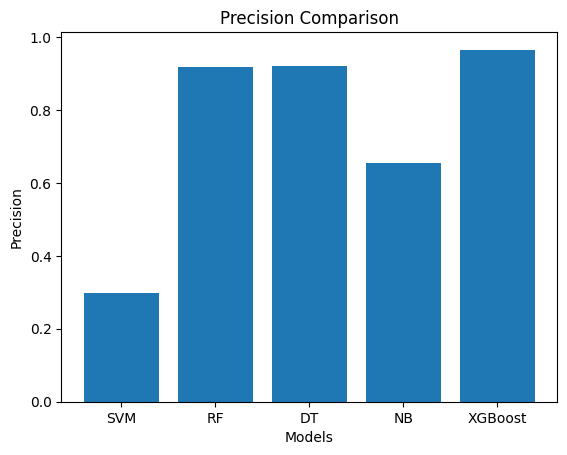

In [94]:
# Plot the precision scores
precisions = [svm_precision, rf_precision, dt_precision, gnb_precision, xgb_precision]
models = ['SVM', 'RF', 'DT', 'NB', 'XGBoost']
plt.bar(models, precisions)
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Precision Comparison')
#plt.xticks(rotation=90, ha='right')
plt.show()



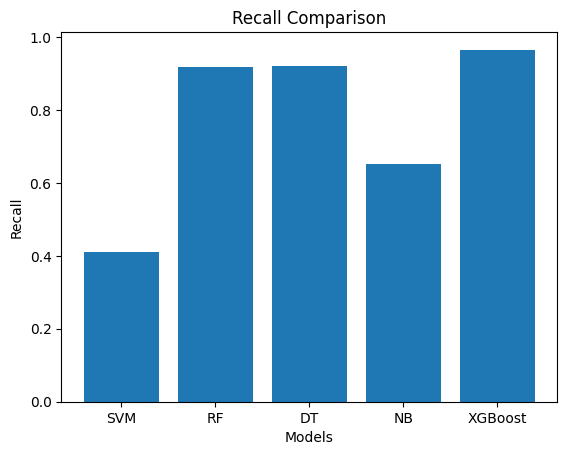

In [95]:
# Plot the recall scores
recalls = [svm_recall, rf_recall, dt_recall, gnb_recall, xgb_recall]
models = ['SVM', 'RF', 'DT', 'NB', 'XGBoost']
plt.bar(models, recalls)
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Recall Comparison')
plt.show()



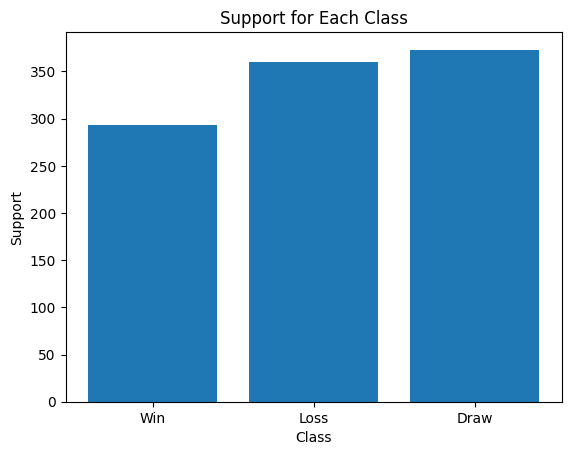

In [84]:
# Plot the support values
supports = [len(y_val[y_val==i]) for i in range(3)]

plt.bar(['Win', 'Loss', 'Draw'], supports)
plt.xlabel('Class')
plt.ylabel('Support')
plt.title('Support for Each Class')
plt.show()

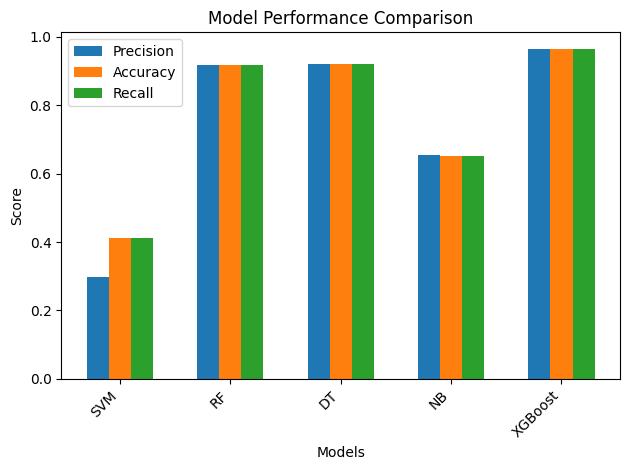

In [102]:
import numpy as np
import matplotlib.pyplot as plt

# Define the metrics and their values for each model
metrics = ['Precision', 'Accuracy', 'Recall']
values = np.array([[svm_precision, svm_accuracy, svm_recall],
                   [rf_precision, rf_accuracy, rf_recall],
                   [dt_precision, dt_accuracy, dt_recall],
                   [gnb_precision, gnb_accuracy, gnb_recall],
                   [xgb_precision, xgb_accuracy, xgb_recall]])

# Set the positions and width of the bars
positions = np.arange(len(models))
width = 0.2

# Define colors for each metric
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Plot the clustered bars
fig, ax = plt.subplots()
for i in range(len(metrics)):
    ax.bar(positions + (i - 1) * width, values[:, i], width, label=metrics[i], color=colors[i])

# Add labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(positions)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


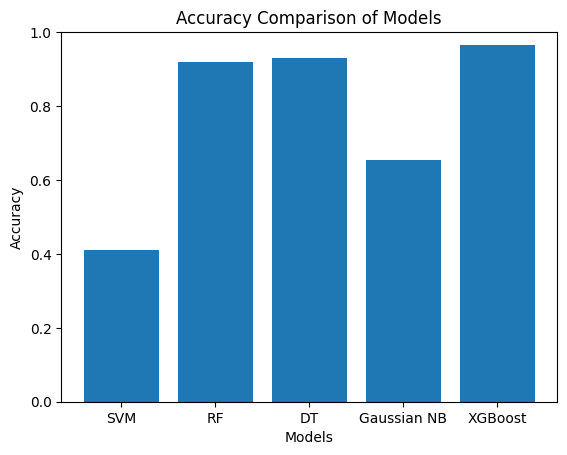

In [69]:
import matplotlib.pyplot as plt

# Accuracy scores
svm_accuracy = accuracy_score(y_val, svm_pred)
rf_accuracy = accuracy_score(y_val, rf_pred)
dt_accuracy = accuracy_score(y_val, dt_pred)
gnb_accuracy = accuracy_score(y_val, gnb_pred)
xgb_accuracy = accuracy_score(y_val, xgb_pred)

# Create a bar graph
models = ['SVM', 'RF', 'DT', 'Gaussian NB', 'XGBoost']
accuracies = [svm_accuracy, rf_accuracy, dt_accuracy, gnb_accuracy, xgb_accuracy]

plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Models')
plt.ylim(0, 1)  # Set y-axis limit to range from 0 to 1
plt.show()


In [103]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Split the data into features (X) and target variable (y) for training set
X_train = train_df.drop(['result', 'result_encoded', 'season', 'time', 'team', 'date'], axis=1)
y_train = train_df['result_encoded']

# Preprocess the test data (val_df) and drop unnecessary columns
X_test = val_df.drop(['result', 'result_encoded', 'season', 'time', 'team', 'date'], axis=1)
y_test = val_df['result_encoded']

# Create the individual models
decision_tree = DecisionTreeClassifier()
naive_bayes = GaussianNB()

# Create the voting classifier
voting_classifier = VotingClassifier(estimators=[('dt', decision_tree), ('nb', naive_bayes)], voting='hard')

# Train the voting classifier
voting_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = voting_classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8001949317738791


In [104]:
duplicate_columns = train_df.columns[train_df.columns.duplicated()]
train_df = train_df.loc[:, ~train_df.columns.duplicated()]


# Check for duplicate column names in test_df
duplicate_columns_test = test_df.columns[test_df.columns.duplicated()]
test_df = test_df.loc[:, ~test_df.columns.duplicated()]

# Check for duplicate column names in val_df
duplicate_columns_val = val_df.columns[val_df.columns.duplicated()]
val_df = val_df.loc[:, ~val_df.columns.duplicated()]


In [107]:
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Split the data into features (X) and target variable (y) for training set
X_train = train_df.drop(['result', 'result_encoded', 'season', 'time', 'team', 'date'], axis=1)
y_train = train_df['result_encoded']

# Preprocess the test data (val_df) and drop unnecessary columns
X_test = val_df.drop(['result', 'result_encoded', 'season', 'time', 'team', 'date'], axis=1)
y_test = val_df['result_encoded']

duplicate_columns = train_df.columns[train_df.columns.duplicated()]
train_df = train_df.loc[:, ~train_df.columns.duplicated()]

# Check for duplicate column names in test_df
duplicate_columns_test = test_df.columns[test_df.columns.duplicated()]
test_df = test_df.loc[:, ~test_df.columns.duplicated()]

# Check for duplicate column names in val_df
duplicate_columns_val = val_df.columns[val_df.columns.duplicated()]
val_df = val_df.loc[:, ~val_df.columns.duplicated()]

# Train a decision tree classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Get the predictions from the decision tree
decision_tree_preds = decision_tree.predict(X_test)

# Train an XGBoost classifier
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)

# Get the predictions from the XGBoost classifier
xgb_preds = xgb_classifier.predict(X_test)

# Combine the predictions using a simple voting mechanism
hybrid_preds = []
for dt_pred, xgb_pred in zip(decision_tree_preds, xgb_preds):
    hybrid_preds.append(max(dt_pred, xgb_pred))

# Calculate the evaluation metrics for the hybrid model
accuracy_xgb_dt = accuracy_score(y_test, hybrid_preds)
precision_xgb_dt = precision_score(y_test, hybrid_preds, average='macro')
recall_xgb_dt = recall_score(y_test, hybrid_preds, average='macro')

print("Hybrid Model Accuracy:", accuracy_xgb_dt)
print("Hybrid Model Precision:", precision_xgb_dt)
print("Hybrid Model Recall:", recall_xgb_dt)


Hybrid Model Accuracy: 0.9415204678362573
Hybrid Model Precision: 0.9416745388740017
Hybrid Model Recall: 0.9352070097529385


In [108]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Split the data into features (X) and target variable (y) for training and testing sets
X_train = train_df.drop(['result', 'result_encoded', 'season', 'time', 'team', 'date'], axis=1)
y_train = train_df['result_encoded']

# Preprocess the test data (val_df) and drop unnecessary columns
X_test = val_df.drop(['result', 'result_encoded', 'season', 'time', 'team', 'date'], axis=1)
y_test = val_df['result_encoded']

duplicate_columns = train_df.columns[train_df.columns.duplicated()]
train_df = train_df.loc[:, ~train_df.columns.duplicated()]

# Check for duplicate column names in test_df
duplicate_columns_test = test_df.columns[test_df.columns.duplicated()]
test_df = test_df.loc[:, ~test_df.columns.duplicated()]

# Check for duplicate column names in val_df
duplicate_columns_val = val_df.columns[val_df.columns.duplicated()]
val_df = val_df.loc[:, ~val_df.columns.duplicated()]


# Create an instance of XGBoost classifier and Random Forest classifier
xgb_model = xgb.XGBClassifier()
rf_model = RandomForestClassifier()

# Fit the models on the training data
xgb_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Generate predictions for the test data
xgb_preds = xgb_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# Combine the predictions using a voting scheme (majority vote)
hybrid_preds = []
for i in range(len(xgb_preds)):
    votes = [xgb_preds[i], rf_preds[i]]
    hybrid_preds.append(max(set(votes), key=votes.count))

# Calculate the evaluation metrics for the hybrid model
accuracy_xgb_rf = accuracy_score(y_test, hybrid_preds)
precision_xgb_rf = precision_score(y_test, hybrid_preds, average='macro')
recall_xgb_rf = recall_score(y_test, hybrid_preds, average='macro')

print("Hybrid Model Accuracy:", accuracy_xgb_rf)
print("Hybrid Model Precision:", precision_xgb_rf)
print("Hybrid Model Recall:", recall_xgb_rf)


Hybrid Model Accuracy: 0.9434697855750487
Hybrid Model Precision: 0.9411780372259727
Hybrid Model Recall: 0.9437657563043009


In [110]:
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Create the base models
xgb_model = XGBClassifier()
svm_model = SVC()

# Create the stacking ensemble model
estimators = [('XGBoost', xgb_model), ('SVM', svm_model)]
stacking_model = StackingClassifier(estimators=estimators)

# Fit the stacking model on the training data
stacking_model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = stacking_model.predict(X_test)

# Calculate the evaluation metrics for the stacking model
accuracy_xgb_svm = accuracy_score(y_test, y_pred)
precision_xgb_svm = precision_score(y_test, y_pred, average='macro')
recall_xgb_svm = recall_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy_xgb_svm)
print("Precision:", precision_xgb_svm)
print("Recall:", recall_xgb_svm)


Accuracy: 0.9658869395711501
Precision: 0.9639037372643161
Recall: 0.9647716147096231


In [111]:
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y) for training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_df.drop(['result', 'result_encoded', 'season', 'time', 'team', 'date'], axis=1), train_df['result_encoded'], test_size=0.2, random_state=42)

# Create the base models
xgb_model = XGBClassifier()
nb_model = GaussianNB()

# Fit the base models on the training data
xgb_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)

# Predict the labels for the test data
xgb_pred = xgb_model.predict(X_test)
nb_pred = nb_model.predict(X_test)

# Create a hybrid model by combining predictions from both models using simple averaging
hybrid_pred = (xgb_pred + nb_pred) / 2

# Round the hybrid predictions to the nearest integer
hybrid_pred = hybrid_pred.round().astype(int)

# Calculate the evaluation metrics for the hybrid model
accuracy_xgb_nb = accuracy_score(y_test, hybrid_pred)
precision_xgb_nb = precision_score(y_test, hybrid_pred, average='macro')
recall_xgb_nb = recall_score(y_test, hybrid_pred, average='macro')

print("Accuracy:", accuracy_xgb_nb)
print("Precision:", precision_xgb_nb)
print("Recall:", recall_xgb_nb)


Accuracy: 0.7473903966597077
Precision: 0.7818279817052134
Recall: 0.749575383866533


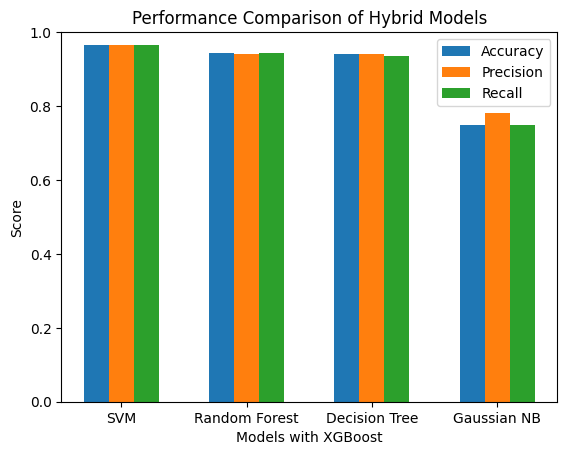

In [114]:
import matplotlib.pyplot as plt

# Accuracy scores
svm_accuracy = accuracy_xgb_svm
rf_accuracy = accuracy_xgb_rf
dt_accuracy = accuracy_xgb_dt
gnb_accuracy = accuracy_xgb_nb

# Precision scores
svm_precision = precision_xgb_svm
rf_precision = precision_xgb_rf
dt_precision = precision_xgb_dt
gnb_precision = precision_xgb_nb

# Recall scores
svm_recall = recall_xgb_svm
rf_recall = recall_xgb_rf
dt_recall = recall_xgb_dt
gnb_recall = recall_xgb_nb

# Set the positions and width of the bars
positions = np.arange(4)
width = 0.2

# Define the model names
models = ['SVM', 'Random Forest', 'Decision Tree', 'Gaussian NB']

# Plot the clustered bars
fig, ax = plt.subplots()
ax.bar(positions - width, [svm_accuracy, rf_accuracy, dt_accuracy, gnb_accuracy], width, label='Accuracy')
ax.bar(positions, [svm_precision, rf_precision, dt_precision, gnb_precision], width, label='Precision')
ax.bar(positions + width, [svm_recall, rf_recall, dt_recall, gnb_recall], width, label='Recall')

# Add labels, title, and legend
ax.set_xlabel('Models with XGBoost')
ax.set_ylabel('Score')
ax.set_title('Performance Comparison of Hybrid Models')
ax.set_xticks(positions)
ax.set_xticklabels(models)
ax.legend()

# Show the plot
plt.ylim(0, 1)  # Set y-axis limit to range from 0 to 1
plt.show()

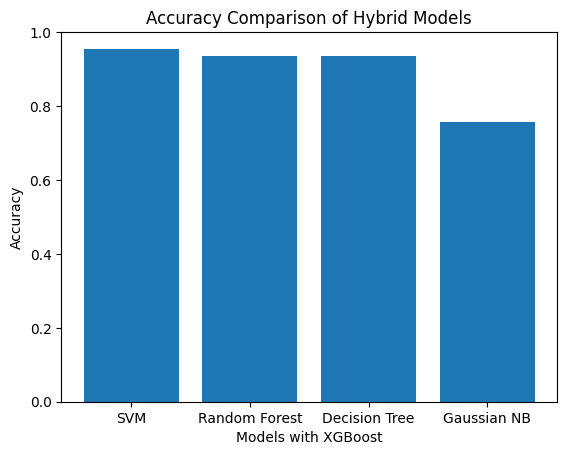

In [67]:
import matplotlib.pyplot as plt

# Accuracy scores
svm_accuracy = accuracy_xgb_svm
rf_accuracy = accuracy_xgb_rf
dt_accuracy = accuracy_xgb_dt
gnb_accuracy = accuracy_xgb_nb

# Create a bar graph
models = ['SVM', 'Random Forest', 'Decision Tree', 'Gaussian NB']
accuracies = [svm_accuracy, rf_accuracy, dt_accuracy, gnb_accuracy]

plt.bar(models, accuracies)
plt.xlabel('Models with XGBoost')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Hybrid Models')
plt.ylim(0, 1)  # Set y-axis limit to range from 0 to 1
plt.show()


In [68]:
#Creating a model

In [69]:
dump(stacking_model, 'stacking_model.pkl')

['stacking_model.pkl']

In [70]:
loaded_model = load('stacking_model.pkl')

In [71]:
X_test = test_df.drop(['result', 'result_encoded', 'season', 'time', 'team', 'date'], axis=1)


In [72]:
y_pred = stacking_model.predict(X_test)


In [73]:
test_df.head()

,date,time,opponent,venue,result,season,team,tkl%,blocks_y,tklw,...,xag,ppa,gls,dist,sot%,npxg/sh,sh_x,g/sh,xg_y,result_encoded
0,2022-08-12,21:00,24.0,1,W,2019,Osasuna,45.5,6,7,...,0.6,5,2,25.0,36.4,0.07,11,0.09,1.5,2
1,2022-08-12,21:00,19.0,2,L,2019,Sevilla,70.0,6,8,...,0.6,8,1,21.5,30.0,0.09,10,0.10,0.9,1
2,2022-08-13,21:00,2.0,1,D,2019,Barcelona,41.7,7,10,...,1.2,17,0,17.0,23.8,0.09,21,0.00,1.9,0
3,2022-08-13,19:00,11.0,2,W,2019,Villarreal,42.9,7,10,...,1.1,10,3,15.1,40.0,0.15,10,0.30,1.5,2
4,2022-08-13,21:00,7.0,2,D,2019,Rayo Vallecano,46.2,13,15,...,0.2,3,0,16.1,50.0,0.13,4,0.00,0.5,0


In [74]:
X_test = test_df.drop(['result', 'team', 'result_encoded','date','season','time'], axis=1)
y_test = test_df['result_encoded']

# Predict the results using the model
y_pred = loaded_model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9442119944211994


In [75]:
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate

X_test = test_df.drop(['result', 'team', 'result_encoded', 'date', 'season', 'time'], axis=1)
y_test = test_df['result_encoded']

# Predict the results using the model
y_pred = loaded_model.predict(X_test)

# Get the team, opponent, expected result, and predicted result
teams = test_df['team']
opponents = test_df['opponent']
expected_results = test_df['result']
le = LabelEncoder()
le.fit(y_test)  # Fit the LabelEncoder on y_test
predicted_results = le.inverse_transform(y_pred)

# Create a list of lists containing the match results
match_results = []
for team, opponent, expected_result, predicted_result in zip(teams, opponents, expected_results, predicted_results):
    match_results.append([team, opponent, expected_result, predicted_result])

# Define the table headers
headers = ["Team", "Opponent", "Expected Result", "Predicted Result"]

# Print the match results table
print(tabulate(match_results, headers=headers, tablefmt='psql'))


+-----------------+------------+-------------------+--------------------+
| Team            |   Opponent | Expected Result   |   Predicted Result |
|-----------------+------------+-------------------+--------------------|
| Osasuna         |         24 | W                 |                  2 |
| Sevilla         |         19 | L                 |                  1 |
| Barcelona       |          2 | D                 |                  0 |
| Villarreal      |         11 | W                 |                  2 |
| Rayo Vallecano  |          7 | D                 |                  0 |
| Celta Vigo      |          9 | D                 |                  0 |
| Valladolid      |          8 | L                 |                  1 |
| Espanyol        |         15 | D                 |                  0 |
| Real Madrid     |         -1 | W                 |                  2 |
| Real Sociedad   |          5 | W                 |                  2 |
| Girona          |         16 | L    

In [76]:
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate

X_test = test_df.drop(['result', 'team', 'result_encoded', 'date', 'season', 'time'], axis=1)
y_test = test_df['result_encoded']

# Predict the results using the model
y_pred = loaded_model.predict(X_test)

# Get the team, opponent, expected result, and predicted result
teams = test_df['team']
opponents = test_df['opponent']
expected_results = test_df['result']
le = LabelEncoder()
le.fit(y_test)  # Fit the LabelEncoder on y_test
predicted_results = le.inverse_transform(y_pred)

# Define a dictionary to map the encoded values to labels
result_labels = {2: 'W', 1: 'L', 0: 'D'}

# Create a list of lists containing the match results
match_results = []
for team, opponent, expected_result, predicted_result in zip(teams, opponents, expected_results, predicted_results):
    predicted_result = result_labels[predicted_result]  # Decode the predicted result
    match_results.append([team, opponent, expected_result, predicted_result])

# Define the table headers
headers = ["Team", "Opponent", "Expected Result", "Predicted Result"]

# Print the match results table
print(tabulate(match_results, headers=headers, tablefmt='psql'))


+-----------------+------------+-------------------+--------------------+
| Team            |   Opponent | Expected Result   | Predicted Result   |
|-----------------+------------+-------------------+--------------------|
| Osasuna         |         24 | W                 | W                  |
| Sevilla         |         19 | L                 | L                  |
| Barcelona       |          2 | D                 | D                  |
| Villarreal      |         11 | W                 | W                  |
| Rayo Vallecano  |          7 | D                 | D                  |
| Celta Vigo      |          9 | D                 | D                  |
| Valladolid      |          8 | L                 | L                  |
| Espanyol        |         15 | D                 | D                  |
| Real Madrid     |         -1 | W                 | W                  |
| Real Sociedad   |          5 | W                 | W                  |
| Girona          |         16 | L    

In [77]:
# Define a dictionary to map the encoded values to labels
result_labels = {2: 'W', 1: 'L', 0: 'D'}

# Create a list of lists containing the match results
match_results = []
for team, opponent, expected_result, predicted_result in zip(teams, opponents, expected_results, predicted_results):
    predicted_result = result_labels[predicted_result]  # Decode the predicted result
    if predicted_result != expected_result:
        match_results.append([team, opponent, expected_result, predicted_result])

# Define the table headers
headers = ["Team", "Opponent", "Expected Result", "Predicted Result"]

# Print the mismatched match results table
print(tabulate(match_results, headers=headers, tablefmt='psql'))

+-----------------+------------+-------------------+--------------------+
| Team            |   Opponent | Expected Result   | Predicted Result   |
|-----------------+------------+-------------------+--------------------|
| Rayo Vallecano  |         16 | W                 | D                  |
| Valencia        |          2 | L                 | D                  |
| Real Sociedad   |         25 | W                 | D                  |
| Girona          |          4 | L                 | D                  |
| Atletico Madrid |         14 | W                 | D                  |
| Getafe          |         14 | D                 | W                  |
| Girona          |         21 | D                 | L                  |
| Real Sociedad   |         16 | D                 | L                  |
| Real Betis      |         24 | D                 | L                  |
| Sevilla         |          6 | D                 | W                  |
| Valencia        |          4 | D    

In [78]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9442119944211994


In [79]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

X_test = test_df.drop(['result', 'team', 'result_encoded', 'date', 'season', 'time'], axis=1)
y_test = test_df['result_encoded']

# Predict the results using the model
y_pred = loaded_model.predict(X_test)

# Get the team, opponent, expected result, and predicted result
teams = test_df['team']
opponents = test_df['opponent']
expected_results = test_df['result']
le = LabelEncoder()
le.fit(y_test)  # Fit the LabelEncoder on y_test
predicted_labels = le.inverse_transform(y_pred)
predicted_results = le.inverse_transform(predicted_labels)

result_points = {2: 3, 0: 1, 1: 0}
team_points = pd.DataFrame({'Team': teams, 'Points': [result_points.get(result, 0) for result in predicted_results]})
points_table = team_points.groupby('Team')['Points'].sum().reset_index().sort_values(by='Points', ascending=False)

# Print the points table
print("\nPoints Table:")
print(points_table)



Points Table:
               Team  Points
3         Barcelona      81
2   Atletico Madrid      71
14      Real Madrid      69
15    Real Sociedad      63
19       Villarreal      55
13       Real Betis      55
11          Osasuna      48
9            Girona      48
16          Sevilla      45
1     Athletic Club      44
12   Rayo Vallecano      42
10         Mallorca      42
8            Getafe      42
4             Cadiz      41
0           Almeria      40
17         Valencia      39
7          Espanyol      38
18       Valladolid      38
5        Celta Vigo      33
6             Elche      25


In [80]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from tabulate import tabulate

X_test = test_df.drop(['result', 'team', 'result_encoded', 'date', 'season', 'time'], axis=1)
y_test = test_df['result_encoded']

# Predict the results using the model
y_pred = loaded_model.predict(X_test)

# Get the team, opponent, expected result, and predicted result
teams = test_df['team']
opponents = test_df['opponent']
expected_results = test_df['result']
le = LabelEncoder()
le.fit(y_test)  # Fit the LabelEncoder on y_test
predicted_labels = le.inverse_transform(y_pred)
predicted_results = le.inverse_transform(predicted_labels)

result_points = {2: 3, 0: 1, 1: 0}
team_points = pd.DataFrame({'Team': teams, 'Points': [result_points.get(result, 0) for result in predicted_results]})
points_table = team_points.groupby('Team')['Points'].sum().reset_index().sort_values(by='Points', ascending=False)

# Print the points table
print("\nPoints Table:")
print(tabulate(points_table, headers='keys', tablefmt='psql'))



Points Table:
+----+-----------------+----------+
|    | Team            |   Points |
|----+-----------------+----------|
|  3 | Barcelona       |       81 |
|  2 | Atletico Madrid |       71 |
| 14 | Real Madrid     |       69 |
| 15 | Real Sociedad   |       63 |
| 19 | Villarreal      |       55 |
| 13 | Real Betis      |       55 |
| 11 | Osasuna         |       48 |
|  9 | Girona          |       48 |
| 16 | Sevilla         |       45 |
|  1 | Athletic Club   |       44 |
| 12 | Rayo Vallecano  |       42 |
| 10 | Mallorca        |       42 |
|  8 | Getafe          |       42 |
|  4 | Cadiz           |       41 |
|  0 | Almeria         |       40 |
| 17 | Valencia        |       39 |
|  7 | Espanyol        |       38 |
| 18 | Valladolid      |       38 |
|  5 | Celta Vigo      |       33 |
|  6 | Elche           |       25 |
+----+-----------------+----------+


In [81]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from tabulate import tabulate

X_test = test_df.drop(['result', 'team', 'result_encoded', 'date', 'season', 'time'], axis=1)
y_test = test_df['result_encoded']

# Predict the results using the model
y_pred = loaded_model.predict(X_test)

# Get the team, opponent, expected result, and predicted result
teams = test_df['team']
opponents = test_df['opponent']
expected_results = test_df['result']
le = LabelEncoder()
le.fit(y_test)  # Fit the LabelEncoder on y_test
predicted_labels = le.inverse_transform(y_pred)
predicted_results = le.inverse_transform(predicted_labels)

result_points = {2: 3, 0: 1, 1: 0}
team_points = pd.DataFrame({'Team': teams, 'Points': [result_points.get(result, 0) for result in predicted_results]})
points_table = team_points.groupby('Team')['Points'].sum().reset_index().sort_values(by='Points', ascending=False)

# Add the "Rankings" column
points_table['Rankings'] = range(1, len(points_table) + 1)

# Reorder the columns
points_table = points_table[['Rankings', 'Team', 'Points']]

# Print the points table
print("\nPoints Table:")
print(tabulate(points_table, headers='keys', tablefmt='psql', showindex=False))



Points Table:
+------------+-----------------+----------+
|   Rankings | Team            |   Points |
|------------+-----------------+----------|
|          1 | Barcelona       |       81 |
|          2 | Atletico Madrid |       71 |
|          3 | Real Madrid     |       69 |
|          4 | Real Sociedad   |       63 |
|          5 | Villarreal      |       55 |
|          6 | Real Betis      |       55 |
|          7 | Osasuna         |       48 |
|          8 | Girona          |       48 |
|          9 | Sevilla         |       45 |
|         10 | Athletic Club   |       44 |
|         11 | Rayo Vallecano  |       42 |
|         12 | Mallorca        |       42 |
|         13 | Getafe          |       42 |
|         14 | Cadiz           |       41 |
|         15 | Almeria         |       40 |
|         16 | Valencia        |       39 |
|         17 | Espanyol        |       38 |
|         18 | Valladolid      |       38 |
|         19 | Celta Vigo      |       33 |
|         20 | El

In [83]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from tabulate import tabulate

X_test = test_df.drop(['result', 'team', 'result_encoded', 'date', 'season', 'time'], axis=1)
y_test = test_df['result_encoded']

# Predict the results using the model
y_pred = loaded_model.predict(X_test)

# Get the team, opponent, expected result, and predicted result
teams = test_df['team']
opponents = test_df['opponent']
expected_results = test_df['result']
le = LabelEncoder()
le.fit(y_test)  # Fit the LabelEncoder on y_test
predicted_labels = le.inverse_transform(y_pred)
predicted_results = le.inverse_transform(predicted_labels)

result_points = {'W': 3, 'D': 1, 'L': 0}
team_points = pd.DataFrame({'Team': teams, 'Points': [result_points.get(result, 0) for result in expected_results]})
points_table = team_points.groupby('Team')['Points'].sum().reset_index().sort_values(by='Points', ascending=False)

# Add the "Rankings" column
points_table['Rankings'] = range(1, len(points_table) + 1)

# Reorder the columns
points_table = points_table[['Rankings', 'Team', 'Points']]

# Print the points table
print("\nPoints Table:")
print(tabulate(points_table, headers='keys', tablefmt='psql', showindex=False))



Points Table:
+------------+-----------------+----------+
|   Rankings | Team            |   Points |
|------------+-----------------+----------|
|          1 | Barcelona       |       81 |
|          2 | Atletico Madrid |       73 |
|          3 | Real Sociedad   |       68 |
|          4 | Real Madrid     |       68 |
|          5 | Real Betis      |       58 |
|          6 | Villarreal      |       57 |
|          7 | Osasuna         |       49 |
|          8 | Girona          |       49 |
|          9 | Rayo Vallecano  |       46 |
|         10 | Athletic Club   |       44 |
|         11 | Mallorca        |       44 |
|         12 | Sevilla         |       42 |
|         13 | Cadiz           |       41 |
|         14 | Almeria         |       40 |
|         15 | Getafe          |       38 |
|         16 | Valencia        |       38 |
|         17 | Espanyol        |       36 |
|         18 | Valladolid      |       36 |
|         19 | Celta Vigo      |       34 |
|         20 | El